# Individual Project

The dataset includes observations on data science salaries from 2020 to 2025. It provides detailed information on job roles, experience levels, employment types, and salary data (both in original currency and USD). The dataset also includes geographic and company-related details such as employee location, remote work ratio, and company size, making it useful for analyzing salary trends and job market dynamics in the data science field.

## Data Preprocessing

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import cm
#!pip install country_converter -q
import country_converter as coco

In [80]:
df = pd.read_csv("DataScience_salaries_2025.csv")

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,USD,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,USD,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,USD,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,USD,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,USD,100000,US,100,US,M


##### <div align="center">  Data Description </div>        

| **Column Name**      |     **Description**                                  |  
|----------------------|:----------------------------------------------------:|
| work_year            | The year the salary was paid |
| experience_level     | The experience level in the job during the year |
| employment_type      | The type of employment for the role |
| job_title            | The role worked in during the year |
| salary               | The total gross salary amount paid |
| salary_currency      | The currency of the salary |
| salary_in_usd        | The salary in USD |
| employee_residence   | Country where the employee resides |
| remote_ratio         | The overall amount of work done remotely |
| company_location     | The country of the employer's main office or contracting branch |
| company_size         | Size of the company |

In [82]:
df.shape

(93597, 11)

In [83]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           93597 non-null  int64 
 1   experience_level    93597 non-null  object
 2   employment_type     93597 non-null  object
 3   job_title           93597 non-null  object
 4   salary              93597 non-null  int64 
 5   salary_currency     93597 non-null  object
 6   salary_in_usd       93597 non-null  int64 
 7   employee_residence  93597 non-null  object
 8   remote_ratio        93597 non-null  int64 
 9   company_location    93597 non-null  object
 10  company_size        93597 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.9+ MB


In [84]:
# Describe numerical variables
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,93597.000000,9.359700e+04,93597.000000,93597.000000
mean,2024.086434,1.623541e+05,157547.696774,21.455816
std,0.641449,2.221425e+05,73649.113729,40.954704
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.062600e+05,106250.000000,0.000000
50%,2024.000000,1.470000e+05,146232.000000,0.000000
75%,2024.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [85]:
# Describe categorical variables
df.describe(include = 'object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,93597,93597,93597,93597,93597,93597,93597
unique,4,4,317,26,96,90,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,54645,93090,13848,88796,84290,84347,90578


## Visualizations and conclusions

#### Top 10 Average Salaries by Job Titles

<Figure size 4000x1200 with 0 Axes>

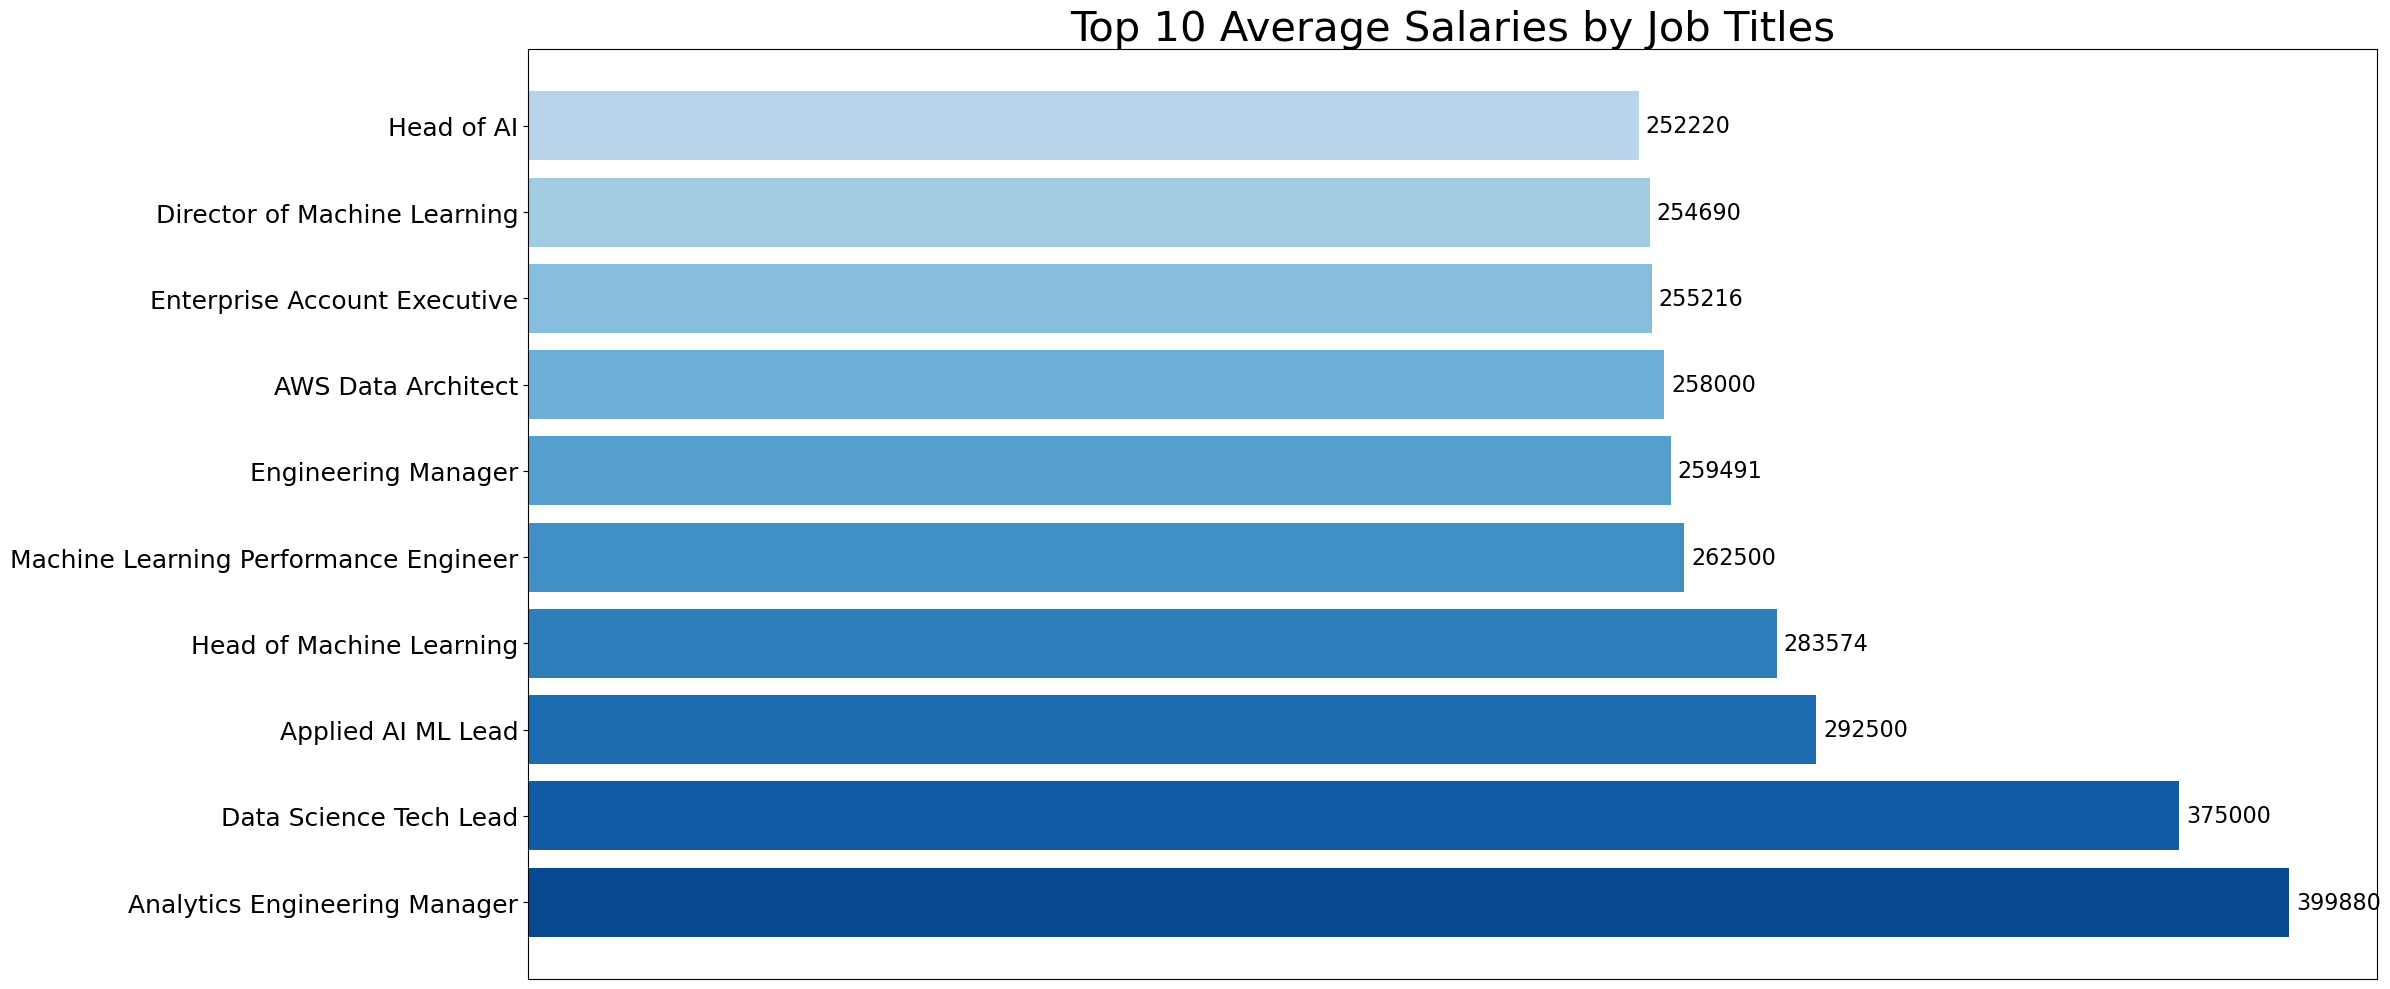

In [86]:
job_title_salary = (
    df['salary_in_usd']
    .groupby(df['job_title'])
    .mean()
    .round(0)
    .nlargest(10)
    .sort_values(ascending=False)
    .reset_index()
)

colors = cm.Blues(np.linspace(0.9, 0.3, len(job_title_salary)))

plt.figure(figsize=(40, 12))
fig, ax = plt.subplots(figsize=(24, 10))

bars = ax.barh(job_title_salary['job_title'], job_title_salary['salary_in_usd'], color=colors)

ax.get_xaxis().set_visible(False)

ax.set_title('Top 10 Average Salaries by Job Titles', fontsize=30)
ax.set_xlabel('Salary in USD', fontsize=20)
ax.set_ylabel('')

ax.tick_params(axis='y', labelsize=18)
ax.bar_label(bars, padding=5, fontsize=16)

plt.tight_layout()
plt.show()

**Conclusion**

Looking at the visualization, it becomes clear that the list of the highest-paid positions predominantly includes management-level employees, which highlights the higher salaries typically associated with senior leadership and decision-making roles.

#### Salaries by position in Armenia in 2024

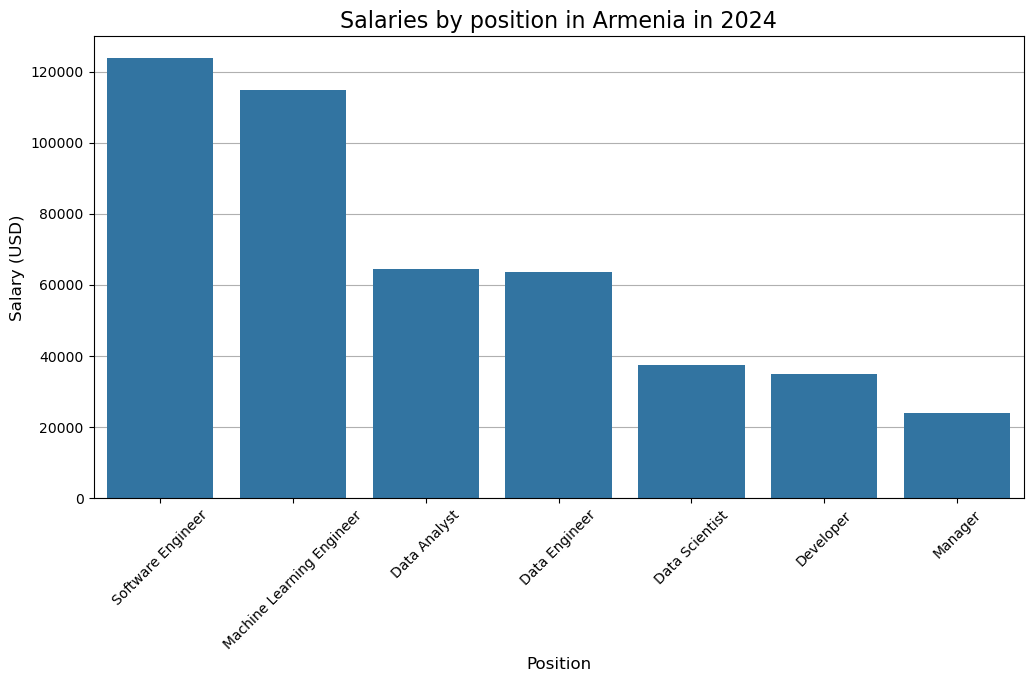

In [93]:
arm_df = df[(df['company_location'] == 'AR') & (df['work_year'] == 2024)]
arm_df = arm_df.sort_values(by='salary_in_usd', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=arm_df, x='job_title', y='salary_in_usd', errorbar=None)

ax.set_title('Salaries by position in Armenia in 2024', fontsize=16)
ax.set_xlabel('Position', fontsize=12)
ax.set_ylabel('Salary (USD)', fontsize=12)

ax.yaxis.grid(True)
ax.set_axisbelow(True)

plt.xticks(rotation=45)

plt.show()

**Conclusion**

The visualization shows that Software Engineering and ML Engineering currently lead the list of high-paying professions in Armenia in 2024, reflecting the growing demand for advanced technical skills in software development and machine learning. These fields are crucial for driving technological innovation and digital transformation.

#### Average Salaries based on Work Year

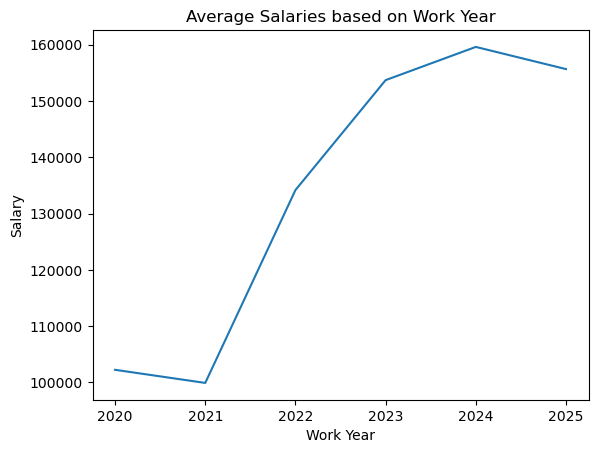

In [88]:
year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x = ['2020', '2021', '2022','2023', '2024', '2025'], y = year_based_salary)
plt.show()

**Conclusion**

The graph shows that after 2020, the salaries of specialists experienced a sharp increase up until 2024. However, in the data for 2025, this upward trend does not persist, and instead, there is even a noticeable downward trend. This could be due to market fluctuations, a shift in demand for certain skill sets, or a lack of sufficient data to establish a clear pattern.

#### Average salary by company size

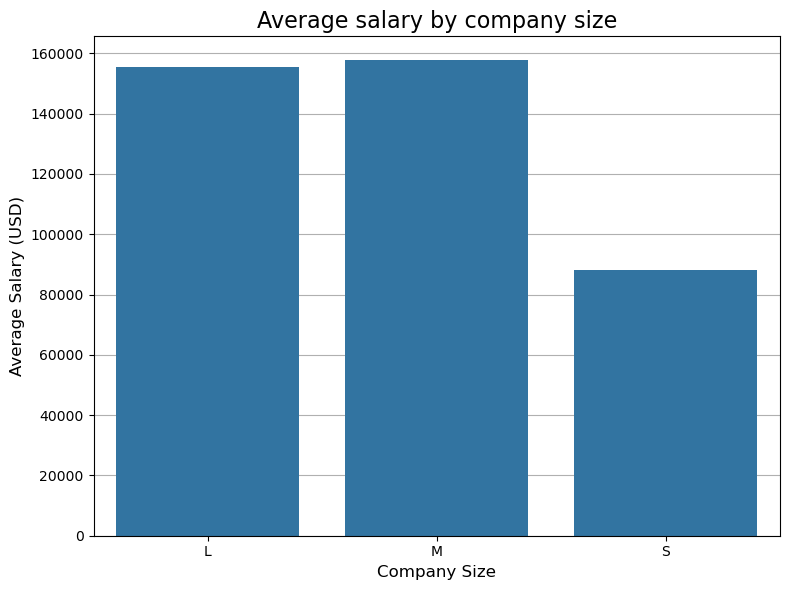

In [89]:
avg_salary_by_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_salary_by_size, x='company_size', y='salary_in_usd', errorbar=None)

ax.set_title('Average salary by company size', fontsize=16)
ax.set_xlabel('Company Size', fontsize=12)
ax.set_ylabel('Average Salary (USD)', fontsize=12)

ax.yaxis.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**Conclusion**

The visualization shows that salaries in medium and large companies are nearly equal and relatively higher compared to salaries in small companies. This could be due to the fact that larger companies have more resources and higher budgets for employee compensation, while small companies may face financial constraints that limit their ability to offer competitive salaries.

#### Remote data scientists around the world

In [101]:
df_map = df.groupby('company_location')['remote_ratio'].mean().reset_index()
df_map['company_location'] =  coco.convert(names = df_map['company_location'], to = "ISO3")
df_map.head()

,company_location,remote_ratio
0,AND,50.000000
1,ARE,60.000000
2,ARM,88.888889
3,ARG,96.774194
4,ASM,100.000000


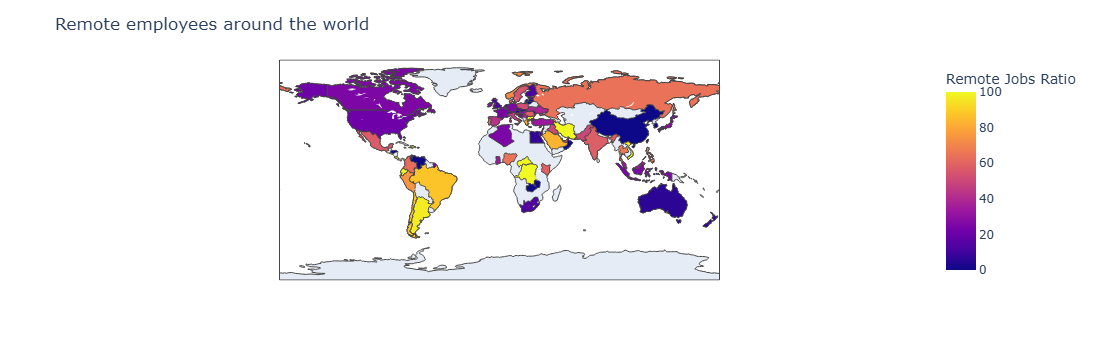

In [94]:
fig = px.choropleth(df_map,
                    locations =df_map.company_location, 
                    color = df_map.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote employees around the world")
fig.show()

**Conclusion**

By analyzing the remote work ratio across various countries, it is clear that the adoption of remote work varies at different levels in different countries.

High Adoption: In some countries like the USA, Dominican Republic, Costa Rica, and others, remote work has become a mainstream employment model due to technological advancements and the transition of certain industries (e.g., IT, customer support) to fully remote operations.

Moderate Adoption: In countries like Armenia, Argentina, Brazil, remote work is relatively widespread but still faces some limitations, or it is not yet feasible in all sectors. In these countries, the adoption of remote work may be slower in certain industries or geographical areas.

Low Adoption: In countries like China, Saudi Arabia, and Cyprus, the remote work ratio is notably low. This could be due to cultural preferences for traditional office work environments, economic factors, or regulatory frameworks that don't yet support widespread remote employment.